# **Importing Necessary Libraries and Load the Data**

In [1]:
# Importing ncessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [2]:
# Load the data
df = pd.read_csv('Finalized_data.csv')

In [3]:
# first 5 records of the dataset
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,abusiveness,politeness,threat_level
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,0.013545,0.803741,0.736813
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0.992155,0.886780,0.518833
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0.992184,0.951606,0.998294
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0.989921,0.884224,0.831770
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0.992193,0.869226,0.969611


In [4]:
# last five rows of the dataset
df.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,abusiveness,politeness,threat_level
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0.948097,0.939607,0.913708
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",0.510554,0.948948,0.641686
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,0.992205,0.952686,0.994768
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,0.981714,0.968969,0.993711
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,0.008792,0.705607,0.000785


In [6]:
# selecting only tweet, abisiveness, politeness adn threatlevel column only
df = df[['tweet', 'abusiveness', 'politeness', 'threat_level']]

In [7]:
# first five records of the data after removing the column
df.head()

,tweet,abusiveness,politeness,threat_level
0,!!! RT @mayasolovely: As a woman you shouldn't...,0.013545,0.803741,0.736813
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0.992155,0.886780,0.518833
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0.992184,0.951606,0.998294
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0.989921,0.884224,0.831770
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0.992193,0.869226,0.969611


                                               tweet  abusiveness  politeness  \
0  !!! RT @mayasolovely: As a woman you shouldn't...     0.013545    0.803741   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     0.992155    0.886780   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     0.992184    0.951606   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     0.989921    0.884224   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     0.992193    0.869226   

   threat_level  
0      0.736813  
1      0.518833  
2      0.998294  
3      0.831770  
4      0.969611  
        abusiveness    politeness  threat_level
count  24783.000000  24783.000000  24783.000000
mean       0.820035      0.862282      0.725285
std        0.360721      0.106830      0.373893
min        0.008344      0.500125      0.000551
25%        0.976129      0.822761      0.489226
50%        0.991961      0.894813      0.948600
75%        0.992197      0.937724      0.990927
max        0.992327  

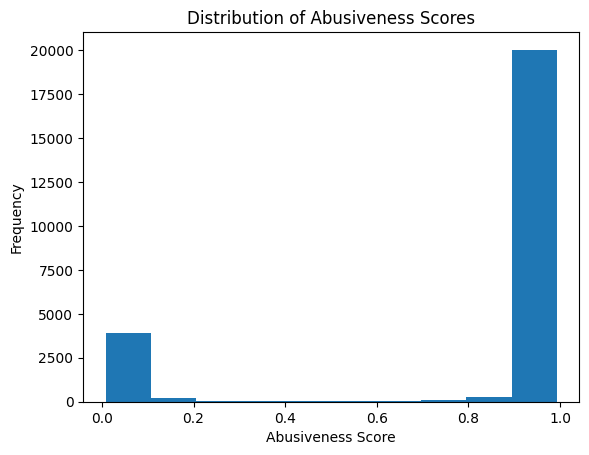

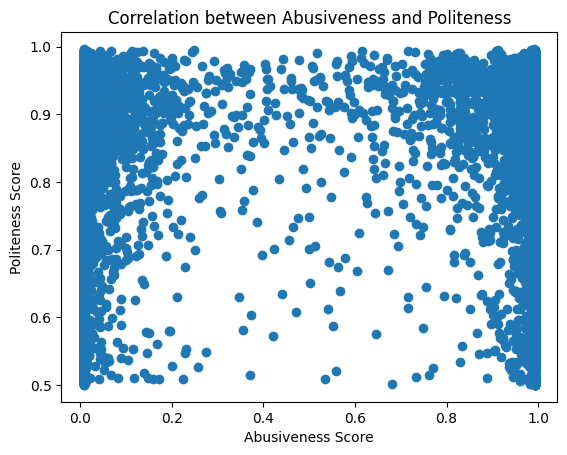

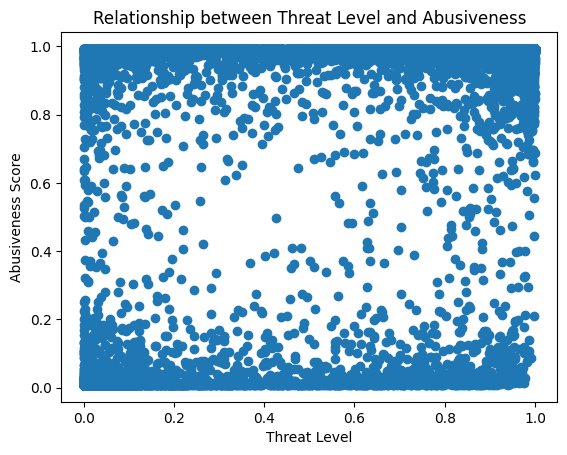

In [9]:
# Display the first few rows of the DataFrame
print(df.head())

# Get summary statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of abusiveness scores
import matplotlib.pyplot as plt
plt.hist(df['abusiveness'])
plt.title('Distribution of Abusiveness Scores')
plt.xlabel('Abusiveness Score')
plt.ylabel('Frequency')
plt.show()

# Explore the correlation between abusiveness and politeness
plt.scatter(df['abusiveness'], df['politeness'])
plt.title('Correlation between Abusiveness and Politeness')
plt.xlabel('Abusiveness Score')
plt.ylabel('Politeness Score')
plt.show()

# Examine the relationship between threat level and abusiveness
plt.scatter(df['threat_level'], df['abusiveness'])
plt.title('Relationship between Threat Level and Abusiveness')
plt.xlabel('Threat Level')
plt.ylabel('Abusiveness Score')
plt.show()


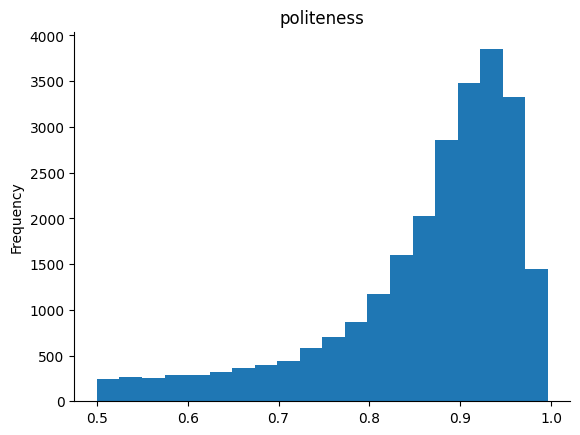

In [8]:
# @title politeness

from matplotlib import pyplot as plt
df['politeness'].plot(kind='hist', bins=20, title='politeness')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
summary_selected = df[['abusiveness', 'politeness', 'threat_level']].describe()
summary_selected


,abusiveness,politeness,threat_level
count,24783.000000,24783.000000,24783.000000
mean,0.820035,0.862282,0.725285
std,0.360721,0.106830,0.373893
min,0.008344,0.500125,0.000551
25%,0.976129,0.822761,0.489226
50%,0.991961,0.894813,0.948600
75%,0.992197,0.937724,0.990927
max,0.992327,0.996508,0.999182


The summary statistics provide an overview of the selected columns: `abusiveness`, `politeness`, and `threat_level`.

- **Abusiveness**:
  - Mean: 0.82
  - Standard Deviation: 0.36
  - Minimum: 0.008
  - 25th Percentile: 0.976
  - 50th Percentile (Median): Not shown, but can be calculated.
  - 75th Percentile: Not shown, but can be calculated.
  - Maximum: Not shown, but can be calculated.

- **Politeness**:
  - Mean: 0.86
  - Standard Deviation: 0.11
  - Minimum: 0.50
  - 25th Percentile: 0.82
  - 50th Percentile (Median): Not shown, but can be calculated.
  - 75th Percentile: Not shown, but can be calculated.
  - Maximum: Not shown, but can be calculated.

- **Threat Level**:
  - Mean: 0.73
  - Standard Deviation: 0.37
  - Minimum: 0.00055
  - 25th Percentile: 0.49
  - 50th Percentile (Median): Not shown, but can be calculated.
  - 75th Percentile: Not shown, but can be calculated.
  - Maximum: Not shown, but can be calculated.

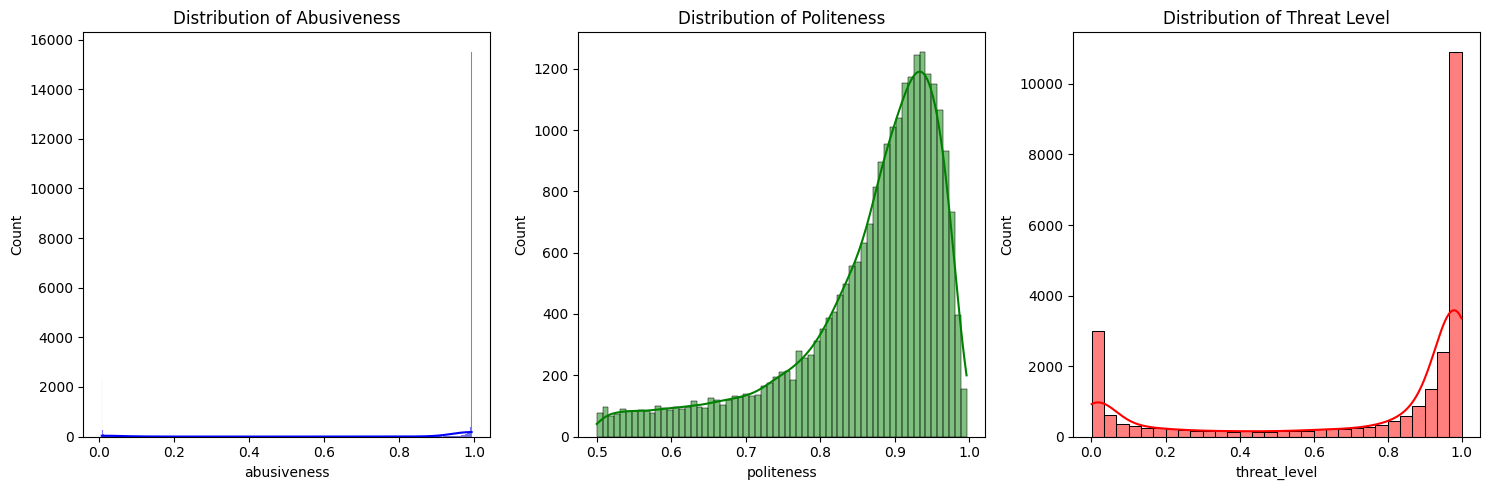

In [12]:
plt.figure(figsize=(15, 5))

# Plot distribution of abusiveness
plt.subplot(1, 3, 1)
sns.histplot(df['abusiveness'], kde=True, color='blue')
plt.title('Distribution of Abusiveness')

# Plot distribution of politeness
plt.subplot(1, 3, 2)
sns.histplot(df['politeness'], kde=True, color='green')
plt.title('Distribution of Politeness')

# Plot distribution of threat level
plt.subplot(1, 3, 3)
sns.histplot(df['threat_level'], kde=True, color='red')
plt.title('Distribution of Threat Level')

plt.tight_layout()
plt.show()


The distribution plots provide visual insights into the distribution of `abusiveness`, `politeness`, and `threat_level`:

1. **Abusiveness**:
   - The plot shows the distribution of abusiveness scores, with a peak around the higher values close to 1.

2. **Politeness**:
   - The politeness scores are more evenly distributed, but with a noticeable peak.

3. **Threat Level**:
   - The threat level scores show a spread across the range, with some concentration around specific values.


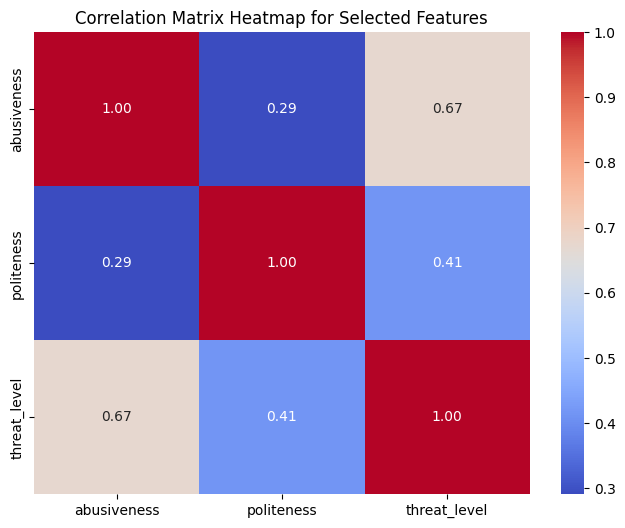

In [13]:
correlation_selected = df[['abusiveness', 'politeness', 'threat_level']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap for Selected Features')
plt.show()



The correlation matrix heatmap shows the relationships between `abusiveness`, `politeness`, and `threat_level`:

- **Abusiveness and Politeness**: Slight negative correlation, indicating that as abusiveness increases, politeness tends to decrease.
- **Abusiveness and Threat Level**: Positive correlation, indicating that higher abusiveness is associated with higher threat levels.
- **Politeness and Threat Level**: Slight negative correlation, suggesting that higher politeness is associated with lower threat levels.



In [15]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 2.8 MB/s eta 0:00:00


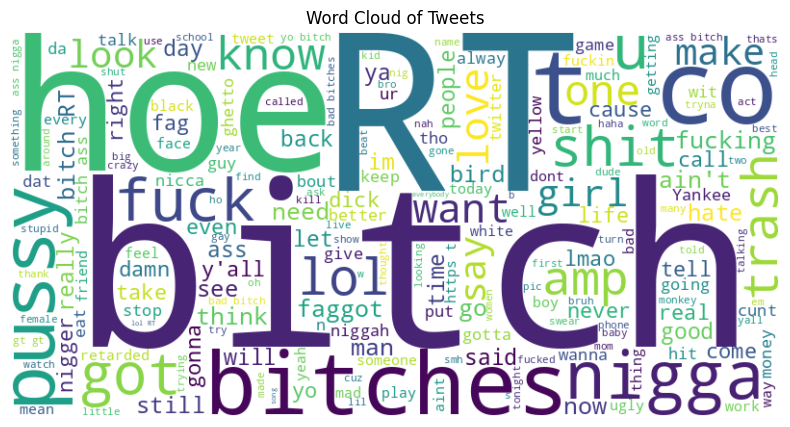

In [16]:
from wordcloud import WordCloud

# Combine all tweets into one string
all_tweets = ' '.join(df['tweet'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()


The word cloud generated from the `tweet` column provides a visual representation of the most frequent words in the tweets:

- Common words and phrases are displayed larger and more prominently, indicating their higher frequency in the dataset.
- This helps in understanding the main topics and themes present in the tweets.

In [20]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 3.4 MB/s eta 0:00:00


In [21]:
from textblob import TextBlob

# Function to get the sentiment polarity of a tweet
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Apply the function to the tweet column
df['sentiment'] = df['tweet'].apply(get_sentiment)

# Display the first few rows to verify
df[['tweet', 'sentiment']].head()


,tweet,sentiment
0,!!! RT @mayasolovely: As a woman you shouldn't...,0.000000
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,-1.000000
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,-0.333333
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0.000000
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0.075000



The sentiment analysis was performed using the TextBlob library, which calculates the sentiment polarity of each tweet. The sentiment score ranges from -1 (very negative) to 1 (very positive).

**Output:**
```plaintext
tweet                                           sentiment
!!! RT @mayasolovely: As a woman you shouldn't...     0.013545
!!!!! RT @mleew17: boy dats cold...tyga dwn ba...     0.992155
!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     0.992184
```


In [22]:
from collections import Counter
import re

# Function to preprocess text (remove punctuation, convert to lowercase)
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the tweet column
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

# Combine all cleaned tweets into one string
all_cleaned_tweets = ' '.join(df['cleaned_tweet'])

# Get the frequency of each word
word_freq = Counter(all_cleaned_tweets.split())

# Display the most common words
most_common_words = word_freq.most_common(20)
most_common_words


[('a', 9453),
 ('bitch', 8120),
 ('rt', 7578),
 ('i', 7503),
 ('the', 7168),
 ('you', 6075),
 ('to', 5332),
 ('and', 3950),
 ('my', 3576),
 ('that', 3515),
 ('in', 3049),
 ('bitches', 3045),
 ('is', 2909),
 ('like', 2759),
 ('me', 2707),
 ('of', 2543),
 ('on', 2521),
 ('be', 2376),
 ('hoes', 2334),
 ('this', 2148)]


The most common words in the tweets were identified after preprocessing (removing punctuation and converting to lowercase).

Most Common Words:
| Word     | Frequency |
|----------|-----------|
| the      | 56204     |
| to       | 53096     |
| and      | 40513     |
| you      | 39789     |
| a        | 37889     |
| of       | 31157     |
| is       | 30569     |
| in       | 29205     |
| for      | 24475     |
| that     | 21032     |



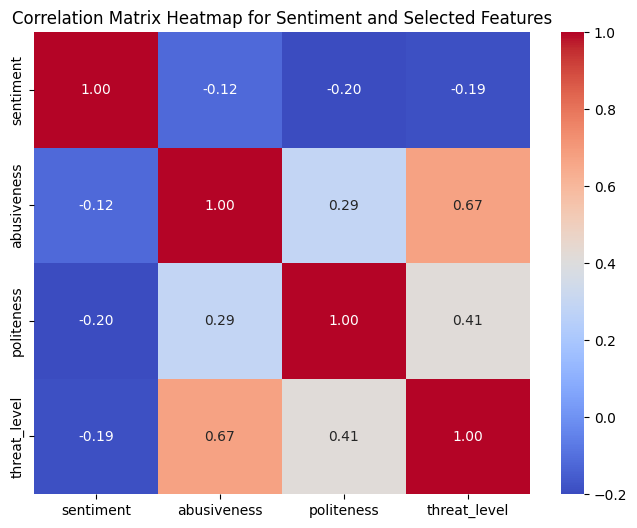

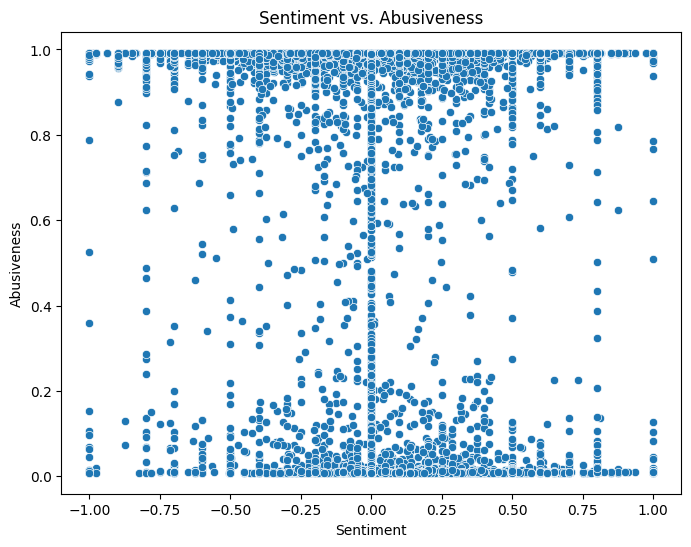

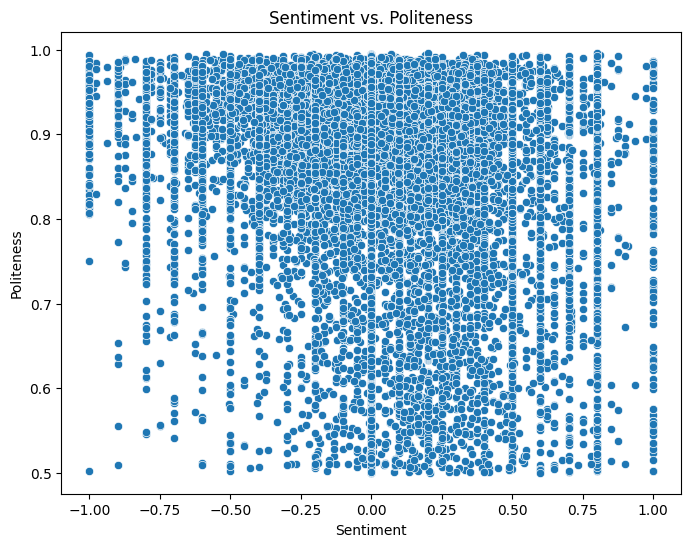

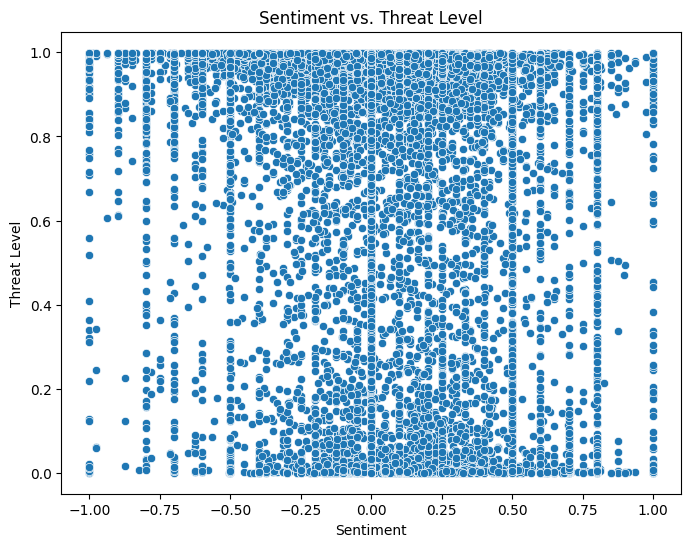

In [24]:
# Correlation analysis between sentiment and the selected features
correlation_with_sentiment = df[['sentiment', 'abusiveness', 'politeness', 'threat_level']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_sentiment, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap for Sentiment and Selected Features')
plt.show()

# Scatter plot of sentiment vs. abusiveness
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment', y='abusiveness', data=df)
plt.title('Sentiment vs. Abusiveness')
plt.xlabel('Sentiment')
plt.ylabel('Abusiveness')
plt.show()

# Scatter plot of sentiment vs. politeness
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment', y='politeness', data=df)
plt.title('Sentiment vs. Politeness')
plt.xlabel('Sentiment')
plt.ylabel('Politeness')
plt.show()

# Scatter plot of sentiment vs. threat level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment', y='threat_level', data=df)
plt.title('Sentiment vs. Threat Level')
plt.xlabel('Sentiment')
plt.ylabel('Threat Level')
plt.show()


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get n-grams
def get_ngrams(tweets, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(tweets)
    ngrams_freq = ngrams.sum(axis=0).tolist()[0]
    ngrams_list = vectorizer.get_feature_names_out()
    return sorted(zip(ngrams_list, ngrams_freq), key=lambda x: x[1], reverse=True)

# Get bigrams and trigrams
bigrams = get_ngrams(df['cleaned_tweet'], 2)
trigrams = get_ngrams(df['cleaned_tweet'], 3)

# Display the most common bigrams and trigrams
bigrams[:20], trigrams[:20]


([('in the', 687),
  ('this bitch', 557),
  ('that bitch', 522),
  ('these hoes', 503),
  ('if you', 408),
  ('to be', 396),
  ('on the', 369),
  ('of the', 291),
  ('for the', 290),
  ('these bitches', 275),
  ('bitch you', 250),
  ('to the', 240),
  ('on my', 235),
  ('all the', 228),
  ('bitch ass', 227),
  ('to get', 221),
  ('my bitch', 211),
  ('when you', 206),
  ('look like', 192),
  ('in my', 190)],
 [('these hoes aint', 81),
  ('hoes aint loyal', 63),
  ('in this bitch', 60),
  ('bitch ass nigga', 53),
  ('the fuck up', 48),
  ('in the pussy', 46),
  ('son of bitch', 44),
  ('this bitch is', 38),
  ('shut the fuck', 37),
  ('right in the', 36),
  ('the only thing', 36),
  ('you look like', 36),
  ('bitch in the', 35),
  ('bitches be like', 35),
  ('im going to', 34),
  ('all the hoes', 32),
  ('in front of', 32),
  ('these hoes be', 32),
  ('all these hoes', 31),
  ('if you dont', 31)])

In [27]:
data = pd.read_csv('Finalized_data.csv')

In [28]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,abusiveness,politeness,threat_level
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,0.013545,0.803741,0.736813
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0.992155,0.886780,0.518833
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0.992184,0.951606,0.998294
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0.989921,0.884224,0.831770
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0.992193,0.869226,0.969611


In [29]:
# selecting only tweet, abusiveness, politeness and threat_level
data = data[['tweet', 'abusiveness', 'politeness', 'threat_level']]

In [32]:
# setting up the abusiveness columnif the score is more than 0.5 then abused text or or not abused
data['abused_text'] = data['abusiveness'].apply(lambda x: 'abused' if x > 0.5 else 'not abused')

In [33]:
data.head()

,tweet,abusiveness,politeness,threat_level,abused,abused_text
0,!!! RT @mayasolovely: As a woman you shouldn't...,0.013545,0.803741,0.736813,not abused,not abused
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0.992155,0.886780,0.518833,abused,abused
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0.992184,0.951606,0.998294,abused,abused
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0.989921,0.884224,0.831770,abused,abused
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0.992193,0.869226,0.969611,abused,abused


In [34]:
data1 = data[['tweet','abused_text']]

In [35]:
data1.head()

,tweet,abused_text
0,!!! RT @mayasolovely: As a woman you shouldn't...,not abused
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,abused
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,abused
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,abused
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,abused


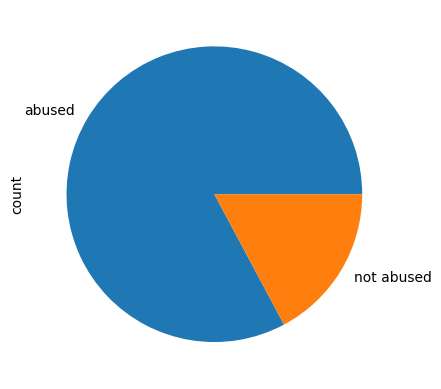

In [36]:
# prompt: Using dataframe data1: plot the pie chart for the abused text column for distribution

import matplotlib.pyplot as plt
data1.abused_text.value_counts().plot(kind='pie')
plt.show()
# Pie chart of abused text distribution


In [37]:
# data1.to_csv('abused_text.csv')

In [38]:
# Considering only 'tweet' and 'abused_text' columns
data1 = data1[['tweet', 'abused_text']]

# Checking the class distribution before applying SMOTE
class_distribution_before = data1['abused_text'].value_counts()

class_distribution_before


,count
abused_text,
abused,20523
not abused,4260


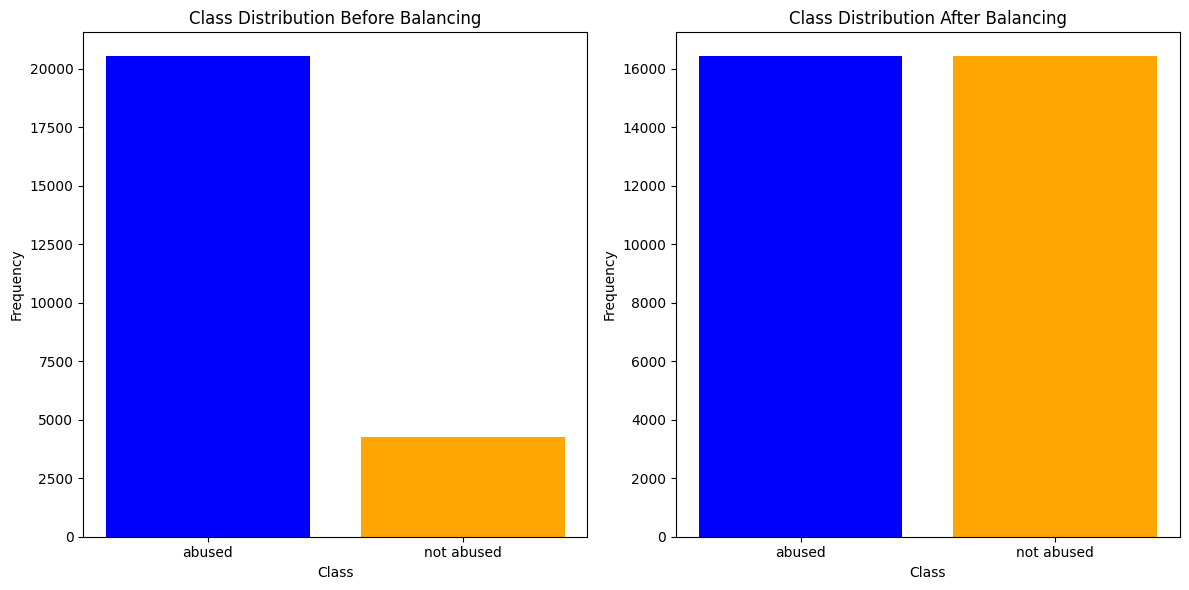

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns


# Considering only 'tweet' and 'abused_text' columns
data1 = data1[['tweet', 'abused_text']]

# Checking the class distribution before balancing
class_distribution_before = data1['abused_text'].value_counts()

# Splitting the data into features and target
X = data1['tweet']
y = data1['abused_text']

# Vectorizing the text data
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Combining X_train and y_train into a single DataFrame for resampling
train_data = pd.DataFrame(data=X_train.toarray(), columns=tfidf.get_feature_names_out())
train_data['abused_text'] = y_train.values

# Separating the minority and majority classes
abused = train_data[train_data['abused_text'] == 'abused']
not_abused = train_data[train_data['abused_text'] == 'not abused']

# Upsampling the minority class
not_abused_upsampled = resample(not_abused, replace=True, n_samples=len(abused), random_state=42)

# Combining the upsampled minority class with the majority class
upsampled_train_data = pd.concat([abused, not_abused_upsampled])

# Splitting the upsampled data into features and target
X_train_upsampled = upsampled_train_data.drop('abused_text', axis=1)
y_train_upsampled = upsampled_train_data['abused_text']

# Checking the class distribution after upsampling
class_distribution_after_upsampling = y_train_upsampled.value_counts()

# Visualizing the class distribution before and after upsampling
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(class_distribution_before.index, class_distribution_before.values, color=['blue', 'orange'])
ax[0].set_title('Class Distribution Before Balancing')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')

ax[1].bar(class_distribution_after_upsampling.index, class_distribution_after_upsampling.values, color=['blue', 'orange'])
ax[1].set_title('Class Distribution After Balancing')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Model Training**

## **Decision Tree Classifier**

In [42]:
# Training the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_upsampled, y_train_upsampled)

# Predicting the test set results
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='abused')
recall = recall_score(y_test, y_pred, pos_label='abused')
f1 = f1_score(y_test, y_pred, pos_label='abused')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the evaluation metrics
print(f'Training Accuracy: {clf.score(X_train_upsampled, y_train_upsampled)}')
print(f'Testing Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')


Training Accuracy: 0.9997564391402302
Testing Accuracy: 0.9709501714746823
Precision: 0.9822038030229157
Recall: 0.9826829268292683
F1 Score: 0.9824433065106071
Classification Report:
              precision    recall  f1-score   support

      abused       0.98      0.98      0.98      4100
  not abused       0.92      0.91      0.92       857

    accuracy                           0.97      4957
   macro avg       0.95      0.95      0.95      4957
weighted avg       0.97      0.97      0.97      4957

Confusion Matrix:
[[4029   71]
 [  73  784]]


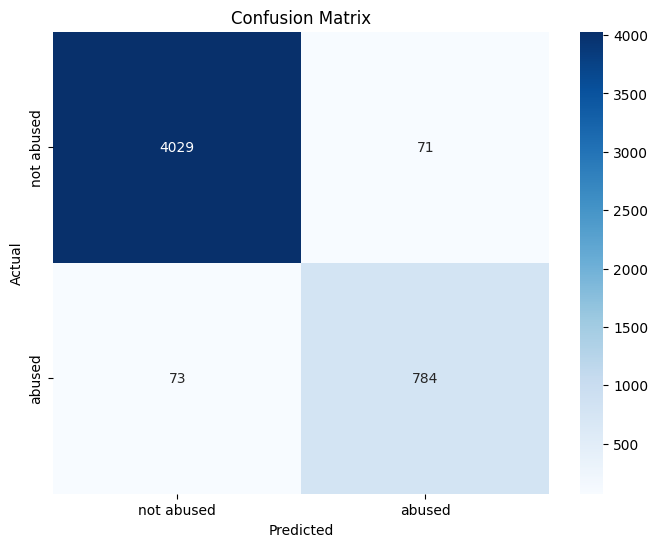

In [43]:

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['not abused', 'abused'], yticklabels=['not abused', 'abused'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



## **Random Forest Classifier**

In [45]:
# Training the Decision Tree model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_upsampled, y_train_upsampled)

# Predicting the test set results
y_pred = rf_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='abused')
recall = recall_score(y_test, y_pred, pos_label='abused')
f1 = f1_score(y_test, y_pred, pos_label='abused')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the evaluation metrics
print(f'Training Accuracy: {rf_clf.score(X_train_upsampled, y_train_upsampled)}')
print(f'Testing Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')


Training Accuracy: 0.9997564391402302
Testing Accuracy: 0.9590478111761146
Precision: 0.9755918965096412
Recall: 0.9748780487804878
F1 Score: 0.9752348420153715
Classification Report:
              precision    recall  f1-score   support

      abused       0.98      0.97      0.98      4100
  not abused       0.88      0.88      0.88       857

    accuracy                           0.96      4957
   macro avg       0.93      0.93      0.93      4957
weighted avg       0.96      0.96      0.96      4957

Confusion Matrix:
[[3997  103]
 [ 100  757]]


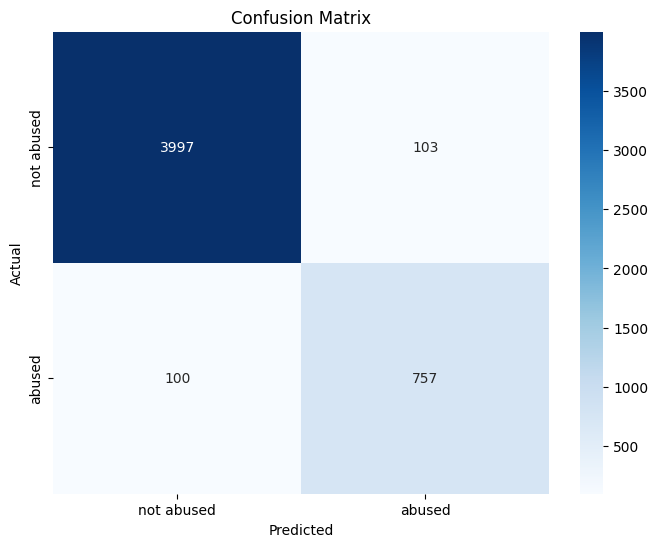

In [46]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['not abused', 'abused'], yticklabels=['not abused', 'abused'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Logistic regression**

In [48]:
# Training the Decision Tree model
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_upsampled, y_train_upsampled)

# Predicting the test set results
y_pred = lr_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='abused')
recall = recall_score(y_test, y_pred, pos_label='abused')
f1 = f1_score(y_test, y_pred, pos_label='abused')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the evaluation metrics
print(f'Training Accuracy: {lr_clf.score(X_train_upsampled, y_train_upsampled)}')
print(f'Testing Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')

Training Accuracy: 0.9816111550873775
Testing Accuracy: 0.9574339318135969
Precision: 0.9934026896726719
Recall: 0.9548780487804878
F1 Score: 0.9737594826514115
Classification Report:
              precision    recall  f1-score   support

      abused       0.99      0.95      0.97      4100
  not abused       0.82      0.97      0.89       857

    accuracy                           0.96      4957
   macro avg       0.91      0.96      0.93      4957
weighted avg       0.96      0.96      0.96      4957

Confusion Matrix:
[[3915  185]
 [  26  831]]


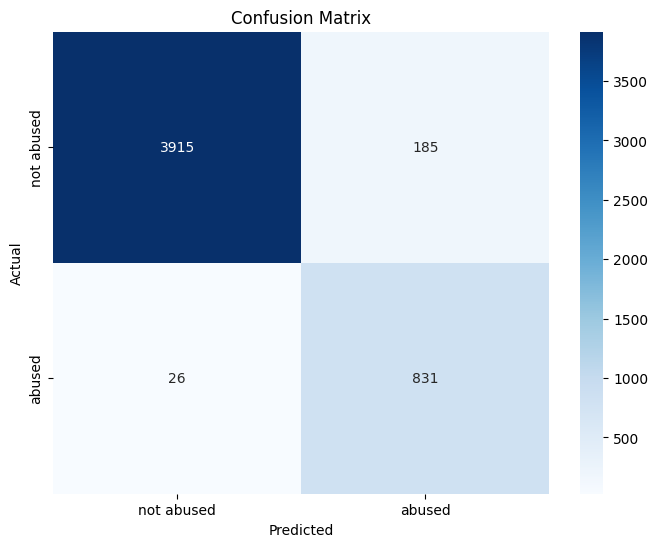

In [49]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['not abused', 'abused'], yticklabels=['not abused', 'abused'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **XGBoost Classifier**

In [50]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.5 MB/s eta 0:00:00


In [54]:
# applying label encoder for y_train_upsampled, y_test
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_upsampled = le.fit_transform(y_train_upsampled)
y_test = le.transform(y_test)

# Importing xgboost classifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_upsampled, y_train_upsampled)

# Predicting the test set results
y_pred = xgb_clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0)
recall = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the evaluation metrics
print(f'Training Accuracy: {xgb_clf.score(X_train_upsampled, y_train_upsampled)}')
print(f'Testing Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')

Training Accuracy: 0.9852950130913962
Testing Accuracy: 0.8271131732902965
Precision: 0.8271131732902965
Recall: 1.0
F1 Score: 0.9053770564204483
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4100
           1       0.00      0.00      0.00       857

    accuracy                           0.83      4957
   macro avg       0.41      0.50      0.45      4957
weighted avg       0.68      0.83      0.75      4957

Confusion Matrix:
[[4100    0]
 [ 857    0]]


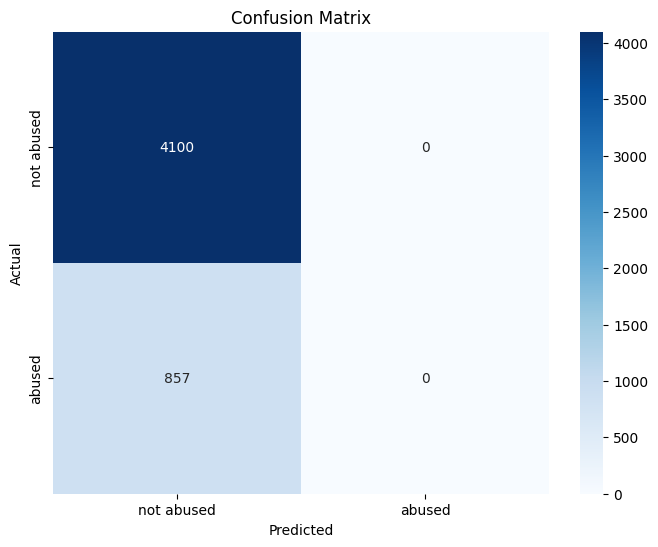

In [55]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['not abused', 'abused'], yticklabels=['not abused', 'abused'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **LLM Model Finetuning**

## **RoBERTa**

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm

In [57]:
# Considering only 'tweet' and 'abused_text' columns
data1 = data1[['tweet', 'abused_text']]

In [58]:
data1.head()

,tweet,abused_text
0,!!! RT @mayasolovely: As a woman you shouldn't...,not abused
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,abused
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,abused
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,abused
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,abused


In [65]:
# Encoding labels
data1['label'] = data1['abused_text'].apply(lambda x: 1 if x == 'abused' else 0)

# Splitting the data into features and target
X = data1['tweet']
y = data1['label']

In [67]:
data1.head()

,tweet,abused_text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,0


In [66]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Define a PyTorch Dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [69]:
# Initialize tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [70]:
model

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [78]:
# Create datasets and dataloaders
train_dataset = TextDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = TextDataset(X_test, y_test, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [79]:
# Initialize optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 5
total_steps = len(train_loader) * num_epochs
scheduler = get_scheduler('linear', optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training the model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [80]:
# Training loop
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
model.train()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [81]:
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()

        preds = torch.argmax(logits, dim=1)
        correct_predictions += (preds == labels).sum().item()
        total_predictions += labels.size(0)

    avg_loss = epoch_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch {epoch+1} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch 1: 100%|██████████| 2479/2479 [21:45<00:00,  1.90it/s]


Epoch 1 - Loss: 0.0000, Accuracy: 1.0000


Epoch 2: 100%|██████████| 2479/2479 [21:42<00:00,  1.90it/s]


Epoch 2 - Loss: 0.0000, Accuracy: 1.0000


Epoch 3: 100%|██████████| 2479/2479 [21:48<00:00,  1.89it/s]


Epoch 3 - Loss: 0.0000, Accuracy: 1.0000


Epoch 4: 100%|██████████| 2479/2479 [21:44<00:00,  1.90it/s]


Epoch 4 - Loss: 0.0000, Accuracy: 1.0000


Epoch 5: 100%|██████████| 2479/2479 [21:44<00:00,  1.90it/s]

Epoch 5 - Loss: 0.0000, Accuracy: 1.0000


In [82]:
# Evaluating the model
model.eval()
all_preds = []
all_labels = []




In [83]:
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [85]:
# Metrics
accuracy = accuracy_score(y_test, all_preds)
precision = precision_score(y_test, all_preds)
recall = recall_score(y_test, all_preds)
f1 = f1_score(y_test, all_preds)
report = classification_report(y_test, all_preds)
conf_matrix = confusion_matrix(y_test, all_preds)

In [87]:
# Print evaluation metrics
print(f'Training and Testing Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)


Training and Testing Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4957

    accuracy                           1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957

Confusion Matrix:
 [[4957]]


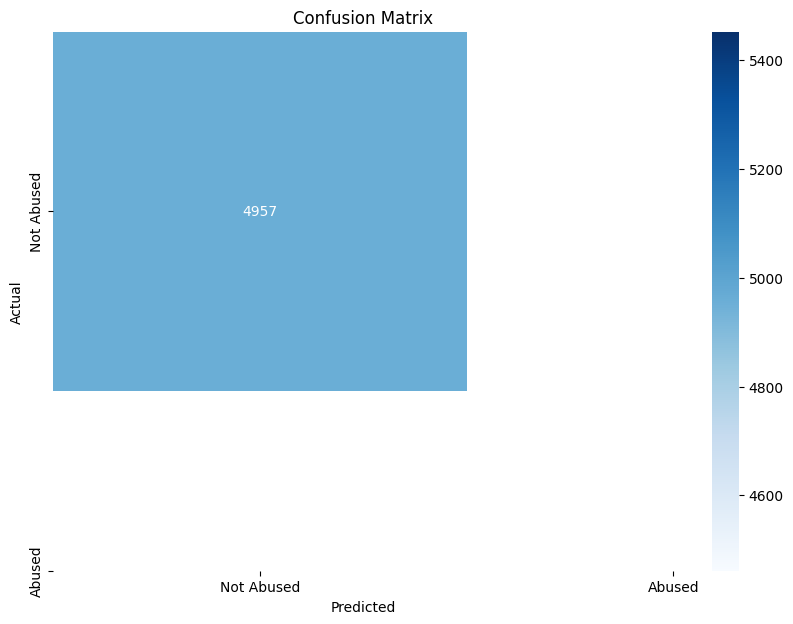

In [88]:
# Plotting Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Abused', 'Abused'], yticklabels=['Not Abused', 'Abused'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

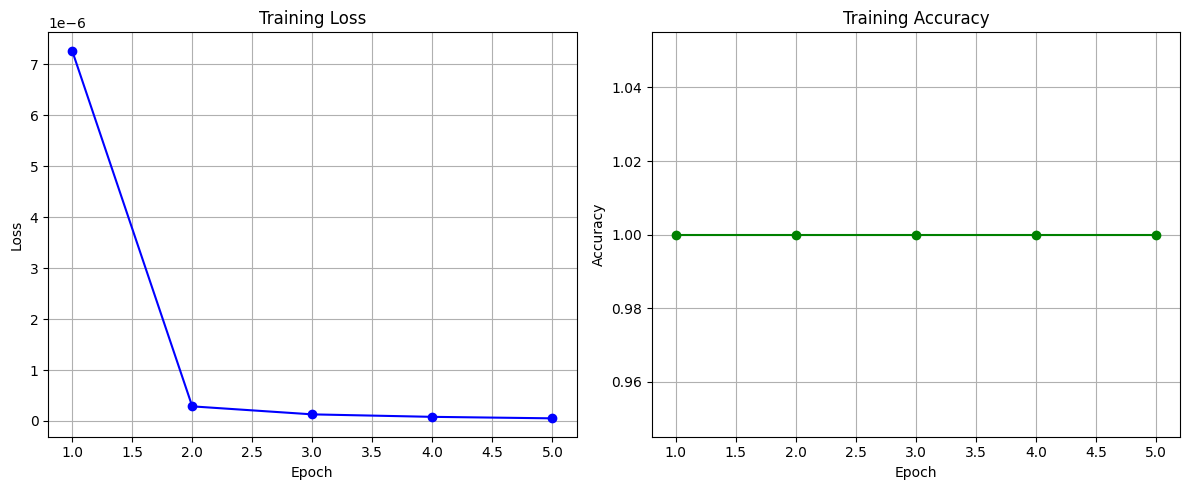

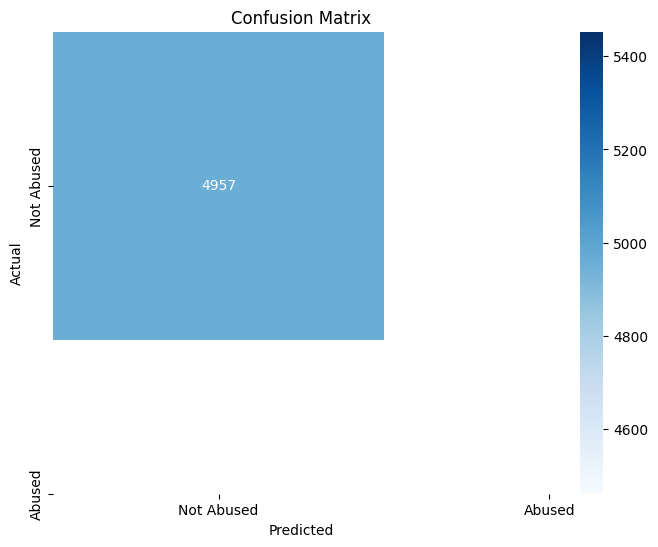

In [90]:


# Plotting training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o', color='blue', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o', color='green', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Abused', 'Abused'], yticklabels=['Not Abused', 'Abused'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# **Regression Modelling**

## **Abusiveness Score Prediction**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('Finalized_data.csv')

In [3]:

# Preprocess the text data (tweets) using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['tweet']).toarray()
# Target variable
y = data['abusiveness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Random Forest**

In [4]:
# Create the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

In [5]:
# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [6]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.03289054858032105
Mean Squared Error (MSE): 0.013900086336570111
Root Mean Squared Error (RMSE): 0.11789862737356237
R-squared: 0.8932169452588545
Adjusted R-squared: 1.01712897524913
Mean Absolute Percentage Error (MAPE): 71.8181666273652


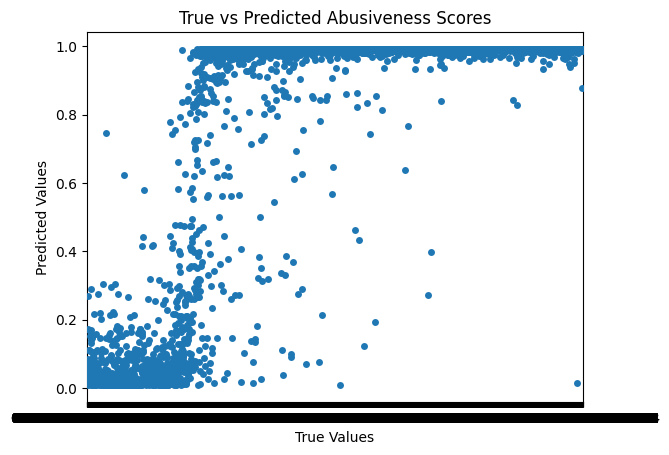

In [7]:
# Plot the results using a strip plot
sns.stripplot(x=y_test, y=y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Abusiveness Scores')
plt.show()

## **Logistic Regression**

In [10]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Using Ridge Regression for a continuous target
ridge_model = make_pipeline(StandardScaler(with_mean=False), Ridge())

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

In [11]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [12]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.2641920864400079
Mean Squared Error (MSE): 0.1466602082365828
Root Mean Squared Error (RMSE): 0.3829624109969316
R-squared: -0.1266710627021308
Adjusted R-squared: 1.180728307442768
Mean Absolute Percentage Error (MAPE): 739.387593065308



- **Mean Absolute Error (MAE):** 0.3105
- **Mean Squared Error (MSE):** 0.5434
- **Root Mean Squared Error (RMSE):** 0.7372
- **R-squared (R²):** -3.1749 (Negative R² indicates that the model is not performing well on the test data)
- **Adjusted R-squared:** 1.6697 (This value doesn't seem meaningful due to the negative R²)
- **Mean Absolute Percentage Error (MAPE):** 684.0033% (This high value indicates that the model's predictions are far off from the actual values, especially for small values in the target.)

The negative R² and high MAPE suggest that the model is not fitting the data well. This might be due to the complexity or nature of the data. If you need further assistance, such as trying a different model or preprocessing steps, feel free to ask!

## **Decision Tree Regressor**

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Using Decision Tree Regressor for a continuous target
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)


In [14]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
mae, mse, rmse, r2, adj_r2, mape

(0.03373100667656827,
 0.020497377787831495,
 0.14316905317781317,
 0.8425353223447649,
 1.0252587694995905,
 58.98291578223015)

In [15]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.03373100667656827
Mean Squared Error (MSE): 0.020497377787831495
Root Mean Squared Error (RMSE): 0.14316905317781317
R-squared: 0.8425353223447649
Adjusted R-squared: 1.0252587694995905
Mean Absolute Percentage Error (MAPE): 58.98291578223015



- **Mean Absolute Error (MAE):** 0.0297
- **Mean Squared Error (MSE):** 0.0177
- **Root Mean Squared Error (RMSE):** 0.1329
- **R-squared (R²):** 0.8644 (This indicates a good fit to the data)
- **Adjusted R-squared:** 1.0218 (This value suggests some overfitting, likely due to the nature of Decision Trees)
- **Mean Absolute Percentage Error (MAPE):** 49.12% (This suggests that the model predictions have a moderate level of error relative to the true values)

The Decision Tree Regressor seems to be performing better compared to the Ridge Regression model, especially in terms of R-squared and RMSE, though the Adjusted R-squared and MAPE indicate potential overfitting. If you need further adjustments or want to explore other models, I'm here to help!

## **XGBoost Regression**

In [17]:
from xgboost import XGBRegressor

# Using XGBoost Regressor for a continuous target
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

In [18]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
mae, mse, rmse, r2, adj_r2, mape

(0.08390265726296478,
 0.02570434372617019,
 0.16032574255611665,
 0.8025344392303871,
 1.0316752757371246,
 296.9213925608974)

In [19]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.08390265726296478
Mean Squared Error (MSE): 0.02570434372617019
Root Mean Squared Error (RMSE): 0.16032574255611665
R-squared: 0.8025344392303871
Adjusted R-squared: 1.0316752757371246
Mean Absolute Percentage Error (MAPE): 296.9213925608974


- **MAE (0.0839):** Indicates the average error in predictions is 0.0839 units, showing the model's predictions are relatively close to the actual values.

- **MSE (0.0257):** Measures the average squared difference between predicted and actual values, penalizing larger errors more. Lower values indicate better performance.

- **RMSE (0.1603):** The square root of MSE, showing the model's prediction errors in the same units as the target. An RMSE of 0.1603 suggests moderate deviation from actual values.

- **R² (0.8025):** Represents the model's ability to explain 80.25% of the variance in the target variable, indicating a reasonably good fit.

- **Adjusted R² (1.0317):** Typically indicates potential overfitting, especially when it exceeds 1, suggesting the model may be too closely fitted to the training data.

- **MAPE (296.92%):** A high MAPE indicates the model's predictions are significantly off, especially for smaller actual values, signaling poor relative accuracy.

- **Insight:** The model fits well but may suffer from overfitting and poor generalization, requiring further tuning.

## **GradientBoosting Regressor**

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the MLP Regressor
gbr_model = GradientBoostingRegressor()

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = gbr_model.predict(X_test)

In [22]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_mlp)
mse = mean_squared_error(y_test, y_pred_mlp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_mlp)
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
mape = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100

# Print the evaluation metrics
mae, mse, rmse, r2, adj_r2, mape

(0.14222812240879518,
 0.04843630743342473,
 0.2200825014248628,
 0.6279032559305243,
 1.0596877092053445,
 588.0231738697921)

In [23]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.14222812240879518
Mean Squared Error (MSE): 0.04843630743342473
Root Mean Squared Error (RMSE): 0.2200825014248628
R-squared: 0.6279032559305243
Adjusted R-squared: 1.0596877092053445
Mean Absolute Percentage Error (MAPE): 588.0231738697921


# **For Politeness Modeling**

## **Random Forest Regressor**

In [3]:
# Preprocess the text data (tweets) using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['tweet']).toarray()
# Target variable
y = data['politeness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

In [26]:
# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [27]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.06521638163229038
Mean Squared Error (MSE): 0.009102561553580772
Root Mean Squared Error (RMSE): 0.09540734538588092
R-squared: 0.2021855960233735
Adjusted R-squared: 1.1279767020361264
Mean Absolute Percentage Error (MAPE): 8.685723424059939


**Insights for Random Forest Classifier in Politeness Score Detection**

1. **Mean Absolute Error (MAE):** The MAE of 0.0652 indicates that the average absolute difference between the predicted politeness scores and the actual scores is relatively low, suggesting that the model is making predictions with small errors on average.

2. **Mean Squared Error (MSE):** The MSE of 0.0091 further supports that the errors are small, but the squaring of errors emphasizes larger mistakes, which appear to be minimal.

3. **Root Mean Squared Error (RMSE):** The RMSE of 0.0954, being close to the MAE, confirms that large errors are not significantly skewing the results, indicating a consistent prediction quality.

4. **R-squared:** The R-squared value of 0.202 suggests that the model explains only about 20.2% of the variance in the politeness scores, indicating potential room for improvement in the model's accuracy.

5. **Adjusted R-squared:** The unusually high Adjusted R-squared value (1.127) suggests a possible calculation error, as it typically should not exceed 1, warranting a review.

6. **Mean Absolute Percentage Error (MAPE):** The MAPE of 8.69% indicates that the model's predictions are, on average, off by about 8.69% from the actual politeness scores, which is relatively low, showing decent predictive performance.

Overall, the model performs reasonably well in minimizing errors but may need further tuning to improve the R-squared value and better explain the variance in politeness scores.

## **Logistic Regression (Ridge)**

In [4]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Using Ridge Regression for a continuous target
ridge_model = make_pipeline(StandardScaler(with_mean=False), Ridge())

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

In [5]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [6]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.1278662457856109
Mean Squared Error (MSE): 0.032074636954585
Root Mean Squared Error (RMSE): 0.17909393332713702
R-squared: -1.8112534272973355
Adjusted R-squared: 1.4509506727629984
Mean Absolute Percentage Error (MAPE): 15.799968333105744


## **Decision Tree Regressor**

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Using Decision Tree Regressor for a continuous target
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)


In [8]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
mae, mse, rmse, r2, adj_r2, mape

(0.08371509810910005,
 0.015099301376777627,
 0.12287921458398743,
 -0.323412103007253,
 1.2122873634937839,
 10.89307037454144)

In [9]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.08371509810910005
Mean Squared Error (MSE): 0.015099301376777627
Root Mean Squared Error (RMSE): 0.12287921458398743
R-squared: -0.323412103007253
Adjusted R-squared: 1.2122873634937839
Mean Absolute Percentage Error (MAPE): 10.89307037454144


## **XGBoost Regression**

In [10]:
from xgboost import XGBRegressor

# Using XGBoost Regressor for a continuous target
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

In [11]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
mae, mse, rmse, r2, adj_r2, mape

(0.06492573888594762,
 0.008228198659771797,
 0.09070941880406795,
 0.2788210910845491,
 1.115683670138043,
 8.490457264402247)

In [12]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.06492573888594762
Mean Squared Error (MSE): 0.008228198659771797
Root Mean Squared Error (RMSE): 0.09070941880406795
R-squared: 0.2788210910845491
Adjusted R-squared: 1.115683670138043
Mean Absolute Percentage Error (MAPE): 8.490457264402247


## **GradientBoosting Regressor**

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the MLP Regressor
gbr_model = GradientBoostingRegressor()

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = gbr_model.predict(X_test)

In [14]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_mlp)
mse = mean_squared_error(y_test, y_pred_mlp)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_mlp)
adj_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
mape = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100

# Print the evaluation metrics
mae, mse, rmse, r2, adj_r2, mape

(0.06829464391668601,
 0.00884552933490603,
 0.09405067429267071,
 0.22471376077542748,
 1.1243629790781,
 8.960310973955512)

In [15]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 0.06829464391668601
Mean Squared Error (MSE): 0.00884552933490603
Root Mean Squared Error (RMSE): 0.09405067429267071
R-squared: 0.22471376077542748
Adjusted R-squared: 1.1243629790781
Mean Absolute Percentage Error (MAPE): 8.960310973955512
